# Time-series analysis

In [1]:
import pandas as pd

In [2]:
apm_table = pd.read_csv('./1808-12.csv', names=['server_id', 'ds', 'y'])

In [3]:
time_usage_pair_for_each_server = {}

In [4]:
server_ids = set(apm_table["server_id"])

In [5]:
for server_id in server_ids:
    apm_data = apm_table[apm_table['server_id'] == server_id][['ds', 'y']]
    apm_data = apm_data.sort_values('ds').reset_index(drop=True)
    time_usage_pair_for_each_server[server_id] = apm_data

In [6]:
import fbprophet

In [7]:
apm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)

In [8]:
target_agent = time_usage_pair_for_each_server[288][-60*24*7:]

In [9]:
apm_prophet.fit(target_agent)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/sewookoh/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
apm_forecast = apm_prophet.make_future_dataframe(periods=60, freq='min')

apm_forecast = apm_prophet.predict(apm_forecast)

Text(0.5,1,'CPU Usage of server 514')

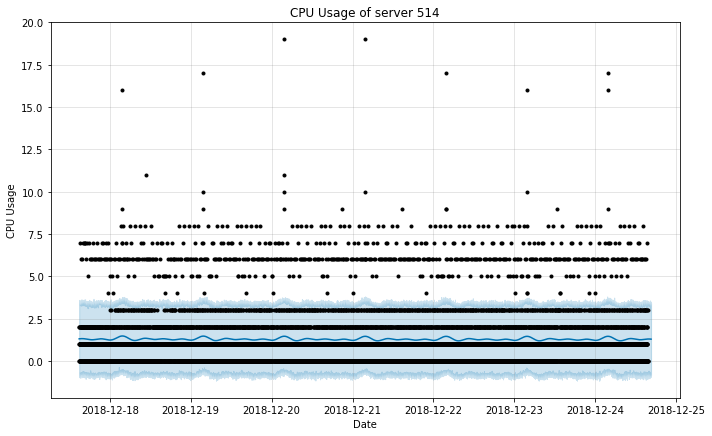

In [11]:
import matplotlib.pyplot as plt
apm_prophet.plot(apm_forecast, xlabel="Date", ylabel="CPU Usage")
plt.title('CPU Usage of server 514')

In [ ]:
apm_

Text(0.5,0,'Time (min)')

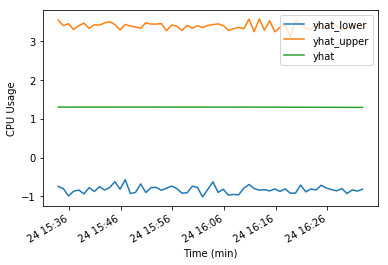

In [12]:
selected_df = apm_forecast[-60:]

selected_df.plot('ds', ['yhat_lower', 'yhat_upper', 'yhat'])
plt.ylabel('CPU Usage')
plt.xlabel('Time (min)')

In [13]:
selected_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
10080,2018-12-24 15:33:51,1.301248,-0.739067,3.542903
10081,2018-12-24 15:34:51,1.301399,-0.797535,3.399281
10082,2018-12-24 15:35:51,1.301541,-0.985549,3.448487
10083,2018-12-24 15:36:51,1.301674,-0.864794,3.298556
10084,2018-12-24 15:37:51,1.301797,-0.834441,3.398822
10085,2018-12-24 15:38:51,1.301910,-0.933323,3.465664
10086,2018-12-24 15:39:51,1.302014,-0.772166,3.327262
10087,2018-12-24 15:40:51,1.302108,-0.871091,3.420842
10088,2018-12-24 15:41:51,1.302192,-0.749456,3.412227
10089,2018-12-24 15:42:51,1.302267,-0.833398,3.469261


Time to train:

In [14]:
%%time
apm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
apm_prophet.fit(target_agent)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/sewookoh/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


CPU times: user 1.68 s, sys: 29.5 ms, total: 1.71 s
Wall time: 1.7 s


Time to test:

In [15]:
%%time
apm_forecast = apm_prophet.make_future_dataframe(periods=60, freq='min')
apm_forecast = apm_prophet.predict(apm_forecast)

CPU times: user 23.6 s, sys: 2.95 s, total: 26.5 s
Wall time: 13.3 s
